# Genome-scale metabolic models

## Preparation

In [1]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/iJO1366.xml.gz')

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [2]:
model.metabolites[0:10]

[<Metabolite 10fthf_c at 0x10e0330f0>,
 <Metabolite 12dgr120_c at 0x10d8e1588>,
 <Metabolite 12dgr140_c at 0x10a6f0470>,
 <Metabolite 12dgr141_c at 0x112293358>,
 <Metabolite 12dgr160_c at 0x10a532198>,
 <Metabolite 12dgr161_c at 0x10a532b70>,
 <Metabolite 12dgr180_c at 0x115ca49b0>,
 <Metabolite 12dgr181_c at 0x115ca4978>,
 <Metabolite 12ppd__R_c at 0x115ca45f8>,
 <Metabolite 12ppd__S_c at 0x115ca4c88>]

There are 1805 metabolites in the model.

In [3]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [4]:
model.metabolites.g3p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x0115e3a160
Formula,C3H5O6P
Compartment,c
In 14 reaction(s),"TALA, FBA, GAPD, TGBPA, TPI, EDA, DDPGALA, TKT1, F6PA, DXPS, DRPA, TRPS1, TKT2, TRPS3"


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [5]:
model.metabolites.10fthf_c

SyntaxError: invalid syntax (<ipython-input-5-2772b042e9ed>, line 1)

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [6]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x010e0330f0
Formula,C20H21N7O7
Compartment,c
In 9 reaction(s),"BIOMASS_Ec_iJO1366_WT_53p95M, MTHFC, BIOMASS_Ec_iJO1366_core_53p95M, ULA4NFT, FTHFD, GARFT, FMETTRS, AICART, FTHFLi"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [7]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [8]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [9]:
model.metabolites.glc__D_c.compartment

'c'

In [10]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [11]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [12]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [13]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [14]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [15]:
model.metabolites.g3p_c.annotation

{'SBO': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00118', 'C00661'],
 'metanetx.chemical': 'MNXM2378',
 'reactome': '29578',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00118', 'UPC00661']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [16]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction TALA at 0x116ba7c50>,
           <Reaction FBA at 0x11673d860>,
           <Reaction GAPD at 0x1167d7c88>,
           <Reaction TGBPA at 0x116bc3080>,
           <Reaction TPI at 0x116be8908>,
           <Reaction EDA at 0x116714128>,
           <Reaction DDPGALA at 0x1166a8780>,
           <Reaction TKT1 at 0x116bd95f8>,
           <Reaction F6PA at 0x11671f7b8>,
           <Reaction DXPS at 0x1166f42b0>,
           <Reaction DRPA at 0x1166df748>,
           <Reaction TRPS1 at 0x116bf3780>,
           <Reaction TKT2 at 0x116bd9390>,
           <Reaction TRPS3 at 0x116bf37b8>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [17]:
model.reactions[0:10]

[<Reaction DM_4crsol_c at 0x116401b70>,
 <Reaction DM_5drib_c at 0x116401c88>,
 <Reaction DM_aacald_c at 0x116401e80>,
 <Reaction DM_amob_c at 0x116401ef0>,
 <Reaction DM_mththf_c at 0x116401f28>,
 <Reaction DM_oxam_c at 0x116401fd0>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x116409048>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x1164090f0>,
 <Reaction EX_12ppd__R_e at 0x116409f98>,
 <Reaction EX_12ppd__S_e at 0x1164094a8>]

There are 2583 reactions in the model.

In [18]:
len(model.reactions)

2583

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [19]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.id, reaction, reaction.name)

TALA TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
FBA FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
GAPD GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TGBPA TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
TPI TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
EDA EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
DDPGALA DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
TKT1 TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
F6PA F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
DXPS DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
DRPA DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
TRPS1 TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
TKT2 TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
TRPS3 TRPS3: 3ig3p

The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [20]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

## Objective

In [21]:
print(model.objective)

Maximize
-1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 1.0*BIOMASS_Ec_iJO1366_core_53p95M


## ATP maintenance requirement

In [22]:
model.reactions.ATPM

Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x01165e5c50
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP + H2O --> ADP + H+ + Phosphate
GPR,
Lower bound,3.15
Upper bound,1000.0


## The math (scary!)

In [23]:
print(model.solver.__str__()[0:1550])

\* Problem: Unknown *\

Maximize
 obj: + BIOMASS_Ec_iJO1366_core_53p95M
 - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

Subject To
 r_1: + ULA4NFT_reverse_07217 - ULA4NFT - MTHFC_reverse_f6fcc + MTHFC
 + GARFT_reverse_7ecb6 - GARFT - FTHFLi_reverse_a6dc7 + FTHFLi
 + FTHFD_reverse_44321 - FTHFD + FMETTRS_reverse_3b6c6 - FMETTRS
 + AICART_reverse_b7b59 - AICART
 + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
 - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M
 + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a
 - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M = 0
 r_2: - PAPA120_reverse_75d70 + PAPA120 + DAGK120_reverse_7cd00
 - DAGK120 - x_666 + x_665 = 0
 r_3: - PAPA140_reverse_255f5 + PAPA140 + DAGK140_reverse_87f8f
 - DAGK140 - x_668 + x_667 = 0
 r_4: - PAPA141_reverse_945ab + PAPA141 + DAGK141_reverse_f6e5f
 - DAGK141 - x_670 + x_669 = 0
 r_5: - PAPA160_reverse_c64df + PAPA160 + DAGK160_reverse_0238d
 - DAGK160 - x_672 + x_671 = 0
 r_6: - PAPA161_reverse_1bc33 + PAPA161 + DAGK161_reverse

## Gene-Protein-Reaction associations

Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. 

In [24]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with to isozymes.

In [25]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [26]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Here a very complicated gene to reaction mapping (ATP synthase).

In [27]:
model.reactions.ATPS4rpp.gene_name_reaction_rule

'(atpA and atpD and atpC and atpG and atpH and atpE and atpF and atpB and atpI) or (atpB and atpF and atpE and atpH and atpG and atpC and atpD and atpA)'

## Finding things

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [28]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Acetyl-D-glucose
ADPglucose
DTDP-4-dehydro-6-deoxy-D-glucose
DTDPglucose
UDPglucose
UDPglucose
UDPglucose


## The stoichiometric matrix S

In [29]:
from cobra.util import create_stoichiometric_matrix
s = create_stoichiometric_matrix(model)
s

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1., -1.,  1.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

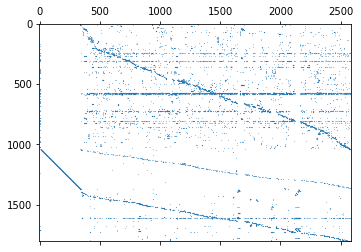

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(s, precision=0.01, markersize=.1)

## Simulating models

In [31]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,2.1907e-04,0.0000
DM_5drib_c,2.2103e-04,0.0000
DM_aacald_c,0.0000e+00,0.0000
DM_amob_c,1.9647e-06,0.0000
DM_mththf_c,4.4010e-04,0.0000
...,...,...
ZN2abcpp,0.0000e+00,-0.0083
ZN2t3pp,0.0000e+00,-0.0021
ZN2tpp,3.3499e-04,0.0000
ZNabcpp,0.0000e+00,-0.0083


Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

In [32]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
sol = infeasible_model.optimize()

cobra/util/solver.py:419 UserWarning: solver status is 'infeasible'
